# Homework #1

* copy this file into your drive
```
File -> Save a copy in Drive
```
* write the code in the cells provided for each questions
* <font color="red"> DO NOT DELETE or MODIFY </font> the first line of each cell (will be used to mark your homework, otherwise you will get 0)
* <font color="red"> DO NOT DELETE or MODIFY </font> function name, function input, and function output (return). Otherwise, you will get 0.
* <font color="red"> DO NOT ADD </font> anything outside the function. Otherwise, you will get 0.
* Make sure homework1_1-1_4 can run properly and can be tested with any image (not rely just on your images); otherwise, your homework will not be marked.

In [38]:
!wget https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe -O kitty.jpg
!wget https://drive.google.com/uc?id=1mIO58Oat2rxLg-c82eN2TLH8sTucQJGI -O noisy_ct.jpg
!wget https://drive.google.com/uc?id=1BNU8_HhPZ96PlImDia8u59QDR4V9wNwb -O amoeba.jpg

--2024-09-03 03:21:56--  https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.google.com (drive.google.com)... 64.233.180.138, 64.233.180.102, 64.233.180.139, ...
Connecting to drive.google.com (drive.google.com)|64.233.180.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe [following]
--2024-09-03 03:21:56--  https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.62.132, 2607:f8b0:4004:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.62.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79570 (78K) [image/jpeg]
Saving to: ‘kitty.jpg’

kitty.jpg           100%[===================>]  77.71K  --.-KB/s    in 0.009s  

2024-09-03 03:21:58 (8.48 MB/s) - ‘kitty.jpg’ saved [

In [39]:
# homework1_1 --> do not modify/delete this first line and do not add anything before this line

# import library for 1.1
import cv2
import numpy as np
import matplotlib.pyplot as plt



def homework1_1(rgb_image):
    gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)

    smoothed_img = cv2.medianBlur(gray_image, 5)

    x, y, w, h = 300, 275, 380, 435
    mark_ROI = smoothed_img[y:y+h, x:x+w]

    L = 256
    Gray_Level_img = np.zeros_like(mark_ROI)
    threshold = 3 * L / 4  # Estimate the stepping point from the graph
    Gray_Level_img[(mark_ROI >= threshold)] = L-1

    return smoothed_img, mark_ROI, Gray_Level_img



# Do not add anything outside the function in the submission

In [40]:
# homework1_2 --> do not modify/delete this first line and do not add anything before this line

def homework1_2(rgb_image):
    filtered_image = np.zeros((rgb_image.shape), dtype=np.uint8)

    gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

    # Condition 1: Apply a sharpening filter
    kernel_sharpening = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpened = cv2.filter2D(gray_image, -1, kernel_sharpening)

    # Condition 2: Apply edge detection using the Sobel operator
    sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
    edges = cv2.magnitude(sobelx, sobely)

    filtered_image = cv2.addWeighted(sharpened, 0.5, edges.astype(np.uint8), 0.5, 0)

    return filtered_image


# Do not add anything outside the function in the submission

In [41]:
# homework1_3 --> do not modify/delete this first line and do not add anything before this line


def homework1_3(gray_image):
    laplacian_filter = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]])

    laplacian_image = cv2.filter2D(gray_image, -1, laplacian_filter)

    laplacian_image = np.clip(laplacian_image, 0, 255).astype(np.uint8)

    sharpen_image = cv2.addWeighted(gray_image, 1.5, laplacian_image, -0.5, 0)

    sharpen_image = np.clip(sharpen_image, 0, 255).astype(np.uint8)

    return laplacian_image, sharpen_image

# Do not add anything outside the function in the submission


# Test our function here

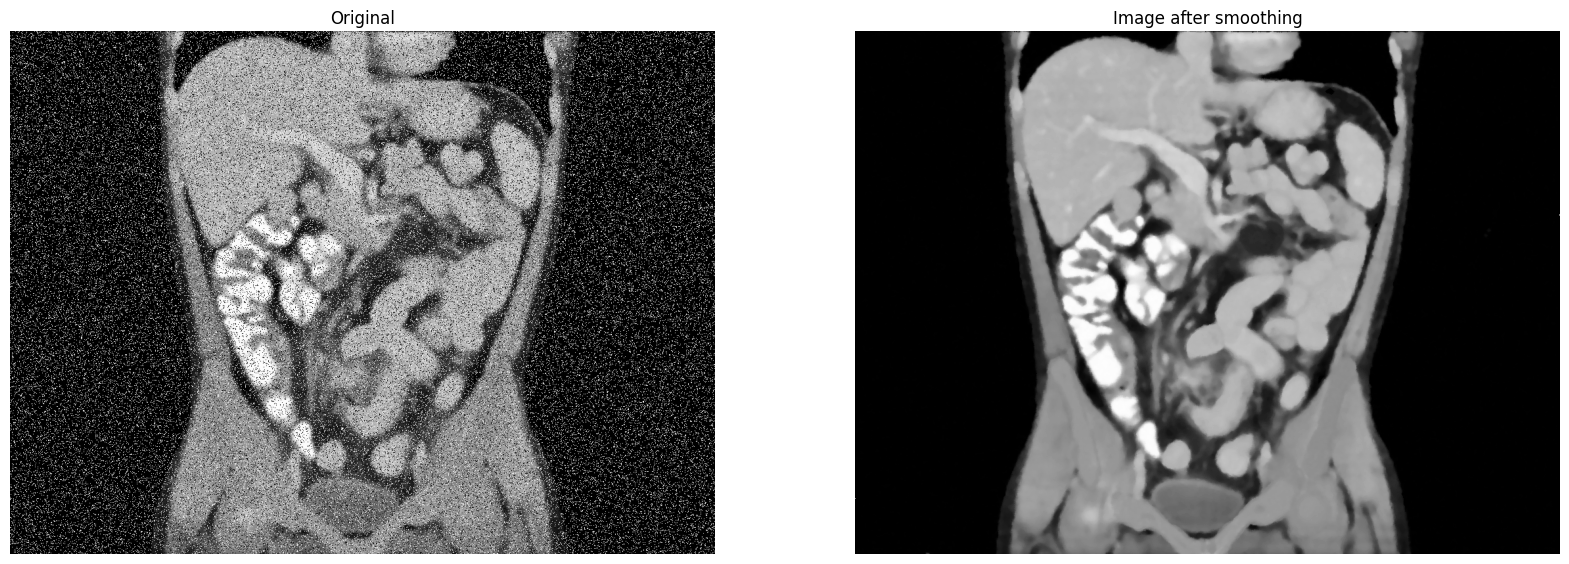

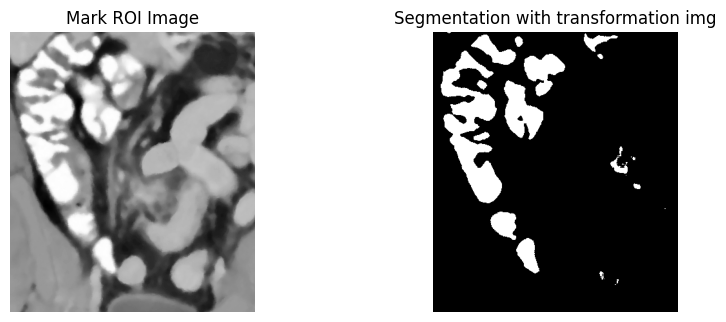

In [42]:
# test homework1_1
img1_1 = cv2.imread('noisy_ct.jpg')
smoothed_img, mark_ROI, Gray_Level_img = homework1_1(img1_1[:,:,::-1])
# Picture show Row1
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(img1_1[:, :, ::-1])
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_img, cmap='gray')
plt.title('Image after smoothing')
plt.axis('off')

# Picture show Row2
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(mark_ROI, cmap='gray')
plt.title('Mark ROI Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(Gray_Level_img, cmap='gray')
plt.title('Segmentation with transformation img')
plt.axis('off')

plt.show()


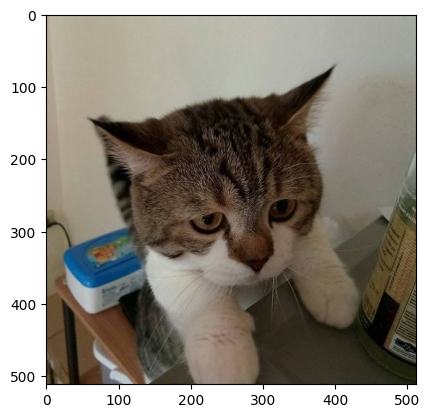

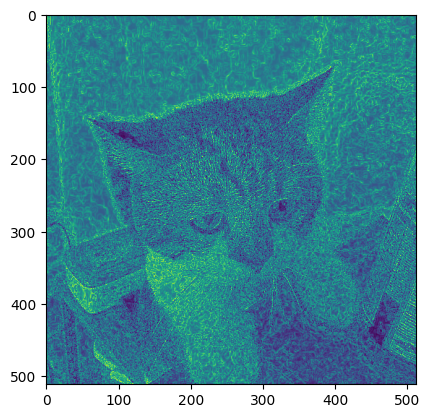

In [43]:
# test homework1_2
img1_2 = cv2.imread("kitty.jpg")
img_hw1_2 = homework1_2(img1_2[:, :, ::-1])
plt.imshow(img1_2[:, :, ::-1])
plt.show()
plt.imshow(img_hw1_2)
plt.show()

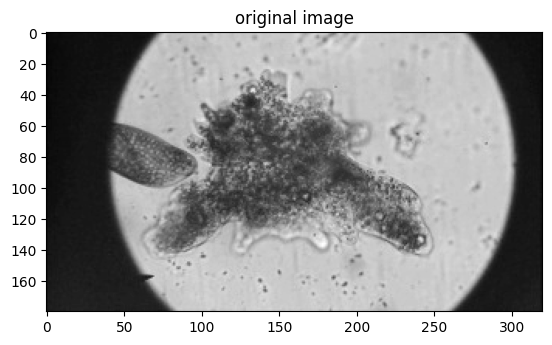

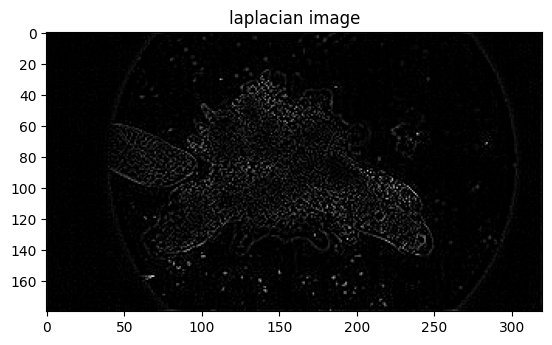

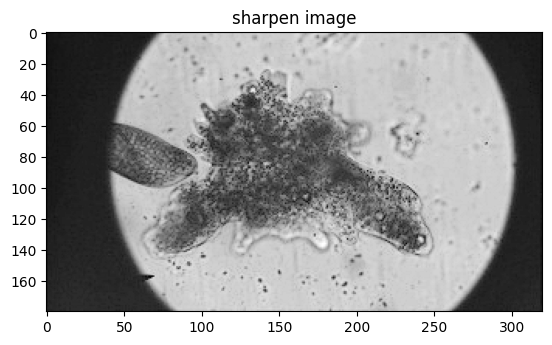

In [44]:
# test homework1_3
img1_3 = cv2.imread("amoeba.jpg")
img_gray13 = cv2.cvtColor(img1_3,cv2.COLOR_BGR2GRAY)
lap_image, sharpen_image = homework1_3(img_gray13)
plt.imshow(img_gray13, cmap = 'gray')
plt.title('original image')
plt.show()
plt.imshow(lap_image, cmap = 'gray')
plt.title('laplacian image')
plt.show()
plt.imshow(sharpen_image, cmap = 'gray')
plt.title('sharpen image')
plt.show()